<a href="https://colab.research.google.com/github/jisu-nam/kubme_ai-Illjo/blob/master/ASS3_Alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

In [60]:
batch_size = 256
num_epoch =10

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

cifar_train = dset.CIFAR10('./data',train =True, transform = transform , download = True)
cifar_test = dset.CIFAR10('./data', train = False, transform = transform, download = True)
train_loader = DataLoader(cifar_train, batch_size, shuffle = True, num_workers=2, drop_last=True)
test_loader = DataLoader(cifar_test, batch_size, shuffle = False, num_workers=2, drop_last=True)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified
Files already downloaded and verified


In [0]:
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 2 * 2, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 10),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 2 * 2)
        x = self.classifier(x)
        return x

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [63]:
model = AlexNet().to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.002)
print(device)

cuda:0


In [64]:
loss_array =[]
for i in range(num_epoch):
    for j, [image, label] in enumerate(train_loader, 0):
        x = image.to(device)
        y_ = label.to(device)

        optimizer.zero_grad()
        output = model.forward(x)

        loss = loss_func(output, y_)
        loss.backward()
        optimizer.step()
        
        loss_array.append(loss.data)
        
        if j % 5000 == 0:
          print(loss)

tensor(2.3035, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.6809, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.3643, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.3153, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.2296, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.0514, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.2097, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.9891, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.8979, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.7816, device='cuda:0', grad_fn=<NllLossBackward>)


In [65]:
correct = 0.0
total = 0

model.eval()

with torch.no_grad():
  for image, label in test_loader:
    x= image.to(device)
    y_ = label.to(device)

    output = model.forward(x)
    _, output_index = torch.max(output, 1)

    total += label.size(0)
    correct += (output_index == y_).sum().float()
    
  print("Accuracy : %.4f"%(100*correct/total))

Accuracy : 65.3446


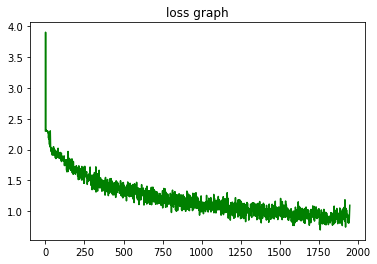

In [66]:
plt.plot(loss_array,'g-')
plt.title('loss graph')
plt.show()